![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
%matplotlib inline

In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head(10)

In [4]:
df= df.iloc[:5000,:]

In [5]:
df.shape

(5000, 3)

In [6]:
df.describe()

,id,target
count,5.000000e+03,5000.000000
mean,3.744403e+06,0.102123
std,2.435542e+06,0.201135
min,2.404880e+05,0.000000
25%,8.098780e+05,0.000000
50%,5.225858e+06,0.000000
75%,5.748294e+06,0.166667
max,6.333373e+06,1.000000


Nota.
Para la ejecucion del ejercicio toco limitar la cantidad de registros del set de datos, esto debido a que generaba problemas de procesamiento en memoria por el volumen del dataset original. Se limito a 10.000

<Axes: >

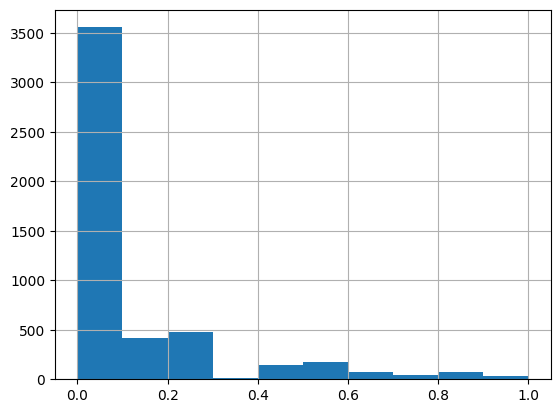

In [7]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [8]:
# Separación de variable de interés (y)
y = df.target

In [9]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [26]:
# Creación de matrices de documentos usando CountVectorizer a partir de X
CountVec = CountVectorizer()

In [27]:
#CountVecTr = CountVec.transform(X_train)
CountVecX = CountVec.fit_transform(X_train)
CountVecTe = CountVec.transform(X_test)

In [28]:
CountVec.vocabulary_

{'boxer': 2013,
 'hitting': 6906,
 '72': 342,
 'year': 15921,
 'old': 9974,
 'got': 6377,
 'ko': 8136,
 'sorry': 13394,
 'bad': 1423,
 'at': 1282,
 'spelling': 13471,
 'did': 4224,
 'you': 15948,
 'pay': 10465,
 'attention': 1312,
 'for': 5889,
 'the': 14332,
 'last': 8237,
 'years': 15923,
 'where': 15634,
 'rs': 12419,
 'in': 7329,
 'senate': 12812,
 'decided': 3872,
 'that': 14326,
 'nothing': 9780,
 'could': 3465,
 'be': 1557,
 'done': 4543,
 'once': 9999,
 'ds': 4672,
 'didn': 4225,
 'have': 6711,
 'super': 13946,
 'majority': 8744,
 'crocodile': 3619,
 'tears': 14211,
 'while': 15643,
 'amusing': 920,
 'show': 13032,
 'lack': 8182,
 'of': 9929,
 'paying': 10472,
 'to': 14503,
 'goings': 6339,
 'on': 9997,
 'and': 941,
 'it': 7795,
 'our': 10156,
 'duty': 4721,
 'as': 1199,
 'coloradans': 2965,
 'make': 8745,
 'his': 6892,
 'life': 8464,
 'virtual': 15368,
 'hell': 6786,
 'until': 15095,
 'then': 14347,
 'she': 12942,
 'll': 8546,
 'no': 9722,
 'doubt': 4572,
 'sporting': 13514,
 

In [30]:
# Creamos el objeto de Regresión Linear
regrCV = RandomForestRegressor(max_depth=10, n_estimators=200)

In [31]:
# Entrenamos nuestro modelo
regrCV.fit(CountVecX, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [32]:
# Hacemos las predicciones que en definitiva una línea
yPredV = regrCV.predict(CountVecTe)

In [33]:
# Error Cuadrado Medio
CountVectorizer = metrics.mean_squared_error(y_test, yPredV)
print("Mean squared error:" , CountVectorizer)

Mean squared error: 0.0345407333796032


Conclusiones:
1. Countvectorizer convierte los documentos en una matriz de palabras - documentos, para esto requiere gran cantidad de memoria y procesamiento. 
2. Countvectorizer es una buena solucion, pero se debe tener en cuenta la cantidad de registros y la capacidad de la maquina donde se este ejecutando el proceso.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Creación de matrices de documentos usando CountVectorizer a partir de X
TrigR= CountVectorizer(ngram_range = (3, 3))

In [13]:
# Visualización de diccionario de palabras con su respectivo ID asignado
TrimXt = TrigR.fit_transform(X_train)
TrimTe = TrigR.transform(X_test)

In [14]:
TrigR.vocabulary_

{'boxer hitting 72': 19698,
 'hitting 72 year': 53082,
 '72 year old': 1112,
 'year old got': 146439,
 'old got ko': 84595,
 'sorry bad at': 106897,
 'bad at spelling': 15244,
 'did you pay': 31905,
 'you pay attention': 147871,
 'pay attention for': 90341,
 'attention for the': 14683,
 'for the last': 42433,
 'the last years': 117631,
 'last years where': 66660,
 'years where the': 146692,
 'where the rs': 141242,
 'the rs in': 119997,
 'rs in the': 100501,
 'in the senate': 57537,
 'the senate decided': 120232,
 'senate decided that': 102857,
 'decided that nothing': 30632,
 'that nothing could': 113328,
 'nothing could be': 79845,
 'could be done': 28529,
 'be done once': 16019,
 'done once the': 34227,
 'once the ds': 85738,
 'the ds didn': 116089,
 'ds didn have': 34851,
 'didn have super': 31944,
 'have super majority': 50023,
 'super majority the': 109755,
 'majority the crocodile': 70854,
 'the crocodile tears': 115730,
 'crocodile tears while': 29551,
 'tears while amusing': 1

In [15]:
# Creamos el objeto de Regresión Linear
regrTr = RandomForestRegressor(max_depth=10, n_estimators=200)

In [16]:
# Entrenamos nuestro modelo
regrTr.fit(TrimXt, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [17]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
yPredT = regrTr.predict(TrimTe)

In [18]:
# Error Cuadrado Medio
Trigramas = metrics.mean_squared_error(y_test, yPredT)
print("Mean squared error:" , Trigramas)

Mean squared error: 0.04374524266396504


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

In [ ]:
#Celda 3

TfidfVectorizer: su objetivo es medir la frecuencia de las palabras en las que aparece en un documento, y la compara con el numero de documentos que menciona ese termino. Como parte de su nombre se encuentra divido en dos: tf: se encarga de resumir la frecuencia. idf: reduccion de la escala de las palabras que aparecen mucho.

Como funciona: genera puntuaciones de frecuencias de palabras que resaltan las mas interesantes en un documento, esto lo compara con los otros documentos, al compararlo contra la muestra global como la palabra no es comun en todos los documentos, si lo es para el documento especifico donde hizo el conteo y eso hace que el documento sea relevante para la palabra. Los articulos la, el entre otros como se repiten en todos los documentos, el documento no sera importante para esta palabra.

TFIDF no genera informacion linguistica esta es una de sus desventajas sobre las palabras, para esto se debe usar otros algoritmos. La gran diferencia con countvectorizer es que TFIDF, no solo enfoca la frecuencia si no que tambien genera la importancia de las palabras y con esto logra generear mejores resultados.


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [19]:
# Celda 4
TfiVec = TfidfVectorizer(max_features=500)

In [20]:
TfiVecTr = TfiVec.fit_transform(X_train)
TfiVecTe = TfiVec.transform(X_test)

In [21]:
TfiVec.vocabulary_

{'year': 493,
 'old': 298,
 'got': 159,
 'bad': 33,
 'at': 30,
 'did': 98,
 'you': 497,
 'pay': 316,
 'for': 142,
 'the': 411,
 'last': 220,
 'years': 494,
 'where': 472,
 'in': 199,
 'that': 410,
 'nothing': 288,
 'could': 89,
 'be': 35,
 'done': 108,
 'once': 300,
 'didn': 99,
 'have': 172,
 'majority': 246,
 'while': 474,
 'show': 375,
 'of': 292,
 'paying': 317,
 'to': 431,
 'on': 299,
 'and': 21,
 'it': 210,
 'our': 308,
 'as': 29,
 'make': 247,
 'his': 184,
 'life': 231,
 'until': 447,
 'then': 415,
 'she': 373,
 'll': 237,
 'no': 284,
 'one': 301,
 'her': 179,
 'right': 356,
 'own': 311,
 'makes': 248,
 'clear': 71,
 'your': 499,
 'all': 12,
 'but': 51,
 'should': 374,
 'not': 287,
 'why': 477,
 'does': 102,
 'making': 249,
 'this': 423,
 'than': 407,
 'is': 206,
 'just': 214,
 'say': 361,
 'get': 151,
 'or': 304,
 'will': 478,
 'place': 323,
 'had': 166,
 'dollars': 105,
 'next': 283,
 'election': 115,
 'are': 26,
 'back': 32,
 'news': 282,
 'exactly': 127,
 'what': 470,
 'was'

In [22]:
# Creamos el objeto de Regresión Linear
regrTf = RandomForestRegressor(max_depth=10, n_estimators=200)

In [23]:
# Entrenamos nuestro modelo
regrTf.fit(TfiVecTr, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [24]:
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
yPredTf = regrTf.predict(TfiVecTe)

In [25]:
# Error Cuadrado Medio
TfidfVectorizer = metrics.mean_squared_error(y_test, yPredTf)
print("Mean squared error:" , TfidfVectorizer)

Mean squared error: 0.04327467518996665


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

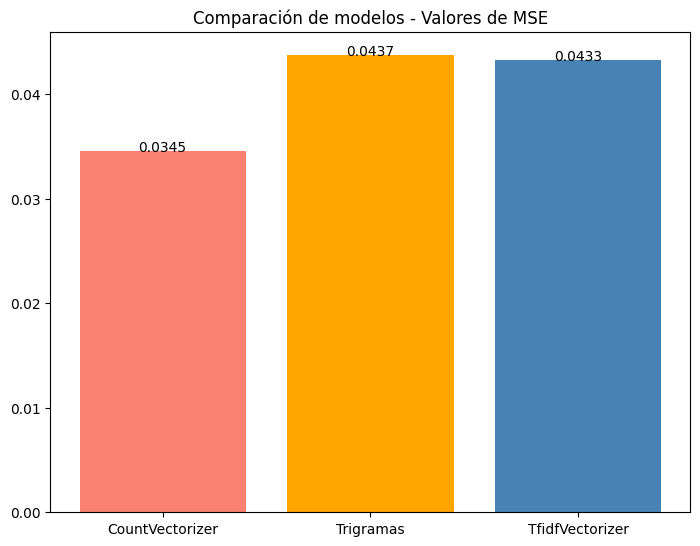

In [34]:
# Comparacion vrs MSE
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos - Valores de MSE")
ejeX = ['CountVectorizer', 'Trigramas' ,'TfidfVectorizer']
ejeY = [CountVectorizer, Trigramas,TfidfVectorizer]
ax.bar(ejeX,ejeY)
ax.bar(ejeX,ejeY, color = ['salmon', 'orange', 'steelblue', 'lightyellow', 'lightgreen'])
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i], '{:.4f}'.format(y[i]), horizontalalignment='center')
addlabels(ejeX,ejeY,plt)
plt.show()

Conclusiones:

1. Para el ejercicio me toco limitar el set de datos a 20.000 registros, estos debido a la cantidad de ram requerida para procesar la informacion.
2. Al realizar el ejercicio y evaluar el modelo se encuentra que tdfidfvectorizer tiene un mejor resultado del mse, y esto va acorde con el resultado de la investigacion del punto anterior , que indica que dtfidfvectorizer es un mejor algoritmo con mayores ventajas, ya que aparte de la frecuencia de las palabras, encuentra la importancia de las palabras en el documento. Esto hace y confirma por que se tiene un mejor resultado en el ejercio.
